1. What is Simple Linear Regression?

    -> Simple Linear Regression is a statistical method used to model the relationship between two variables — one independent (predictor) and one dependent (response). It fits a straight line (y = mx + c) through the data points to predict the value of the dependent variable based on the independent variable.

2. What are the key assumptions of Simple Linear Regression?

    -> The key assumptions of Simple Linear Regression include linearity (a linear relationship exists between the independent and dependent variables), independence (observations are independent of each other), homoscedasticity (constant variance of errors across all levels of the independent variable), and normality (the residuals or errors are normally distributed).

3.  What is heteroscedasticity, and why is it important to address in regression models?

    -> Heteroscedasticity refers to the situation where the variance of the residuals (errors) is not constant across all levels of the independent variable. This violates one of the key assumptions of regression and can lead to inefficient estimates and misleading statistical tests. Addressing it is important to ensure accurate prediction, proper interpretation of coefficients, and reliable confidence intervals.

4. What is Multiple Linear Regression?

    -> Multiple Linear Regression is an extension of Simple Linear Regression that models the relationship between one dependent variable and two or more independent variables. This approach helps capture more complex relationships and improves prediction accuracy when multiple factors influence the target variable.

5.  What is polynomial regression, and how does it differ from linear
regression?

    -> Polynomial regression is a type of regression that models the relationship between the independent and dependent variables as an nth-degree polynomial, allowing for curved lines instead of a straight one. Unlike linear regression, which fits a straight line, polynomial regression can capture nonlinear patterns in the data by including higher-order terms (like x², x³).


1.9800000000000004
0.17999999999999794
[ 2.16  4.14  6.12  8.1  10.08]


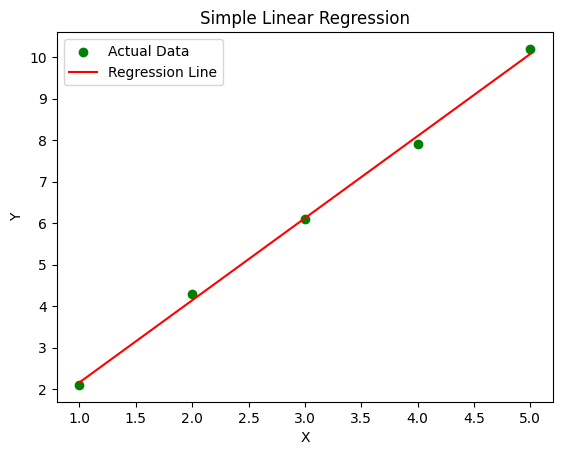

In [5]:
# 6.  Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# X = [1, 2, 3, 4, 5] , Y = [2.1, 4.3, 6.1, 7.9, 10.2]

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

X = [1, 2, 3, 4, 5]
Y = [2.1, 4.3, 6.1, 7.9, 10.2]

X = np.array(X).reshape(-1, 1)
Y = np.array(Y)
model = LinearRegression()
model.fit(X, Y)

print(model.coef_[0])
print(model.intercept_)

Y_pred = model.predict(X)
print(Y_pred)

plt.scatter(X, Y, color='green', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [10]:
# 7. Fit a Multiple Linear Regression model on this sample data: ● Area = [1200, 1500, 1800, 2000] ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000], Check for multicollinearity using VIF and report the results.

import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

df = pd.DataFrame({
    'Area': Area,
    'Rooms': Rooms,
    'Price': Price
})

X = df[['Area', 'Rooms']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)

print(model.coef_)
print(model.intercept_)

X_const = sm.add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

[   63.15789474 34736.84210526]
103157.89473684214
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


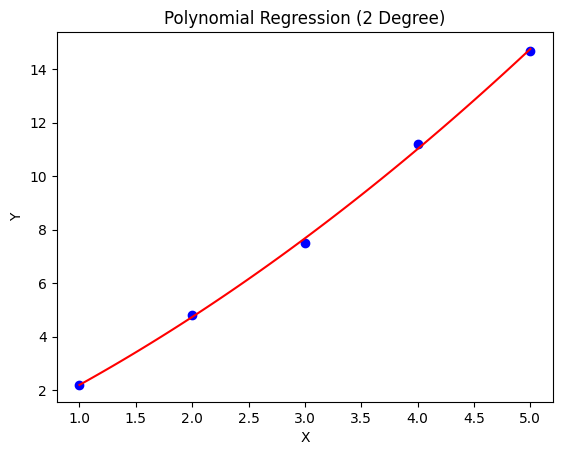

In [15]:
# 8.  Implement polynomial regression on the following data: ● X = [1, 2, 3, 4, 5] #● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.

from sklearn.preprocessing import PolynomialFeatures

X = [1, 2, 3, 4, 5]
Y = [2.2, 4.8, 7.5, 11.2, 14.7]

x = np.array(X).reshape(-1, 1)
y = np.array(Y)

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred = model.predict(x_range_poly)

plt.scatter(x, y, color='blue')
plt.plot(x_range, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (2 Degree)')
plt.show()

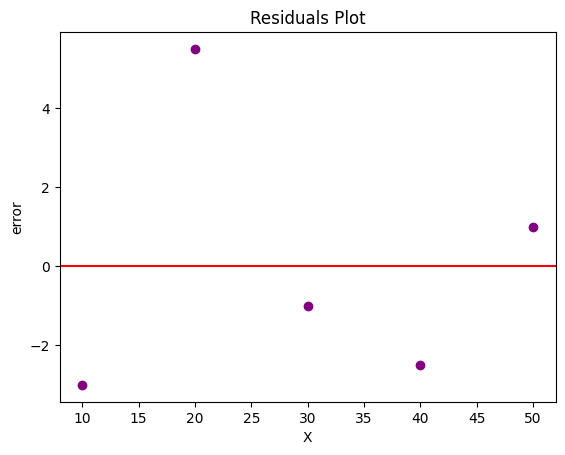

In [21]:
# 9. Create a residuals plot for a regression model trained on this data: ● X = [10, 20, 30, 40, 50] ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.

X = [10, 20, 30, 40, 50]
Y = [15, 35, 40, 50, 65]

x = np.array(X).reshape(-1, 1)
y = np.array(Y)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

error = y - y_pred
plt.scatter(x, error, color='purple')
plt.axhline(y=0, color='red')
plt.xlabel('X')
plt.ylabel('error')
plt.title('Residuals Plot')
plt.show()

10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.However,you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

    -> To address heteroscedasticity and multicollinearity in the housing price regression model, I would take the these steps
    First, to tackle heteroscedasticity, I would apply transformations to the target variable, such as a log or square root transformation, which can stabilize variance. I will also explore using models like Ridge regression or Generalized Least Squares that are more resilient to heteroscedastic errors. Additionally, I would consider adding or refining features that might be causing the variance imbalance, and ensure residual plots show random scatter post-adjustment.
    
    For multicollinearity (high correlation among independent variables), I would calculate Variance Inflation Factors (VIF) to identify problematic features. Features with very high VIF would either be dropped or combined or I would use dimensionality reduction techniques like Principal Component Analysis (PCA). Alternatively, Ridge or Lasso regression can be used, as they penalize large coefficients and help reduce the impact of multicollinearity.